<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/breast_cancer_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer()

In [70]:
cancer.target.shape

(569,)

In [71]:
cancer.data.shape

(569, 30)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.20)

In [76]:
X_train.shape

(455, 30)

In [80]:
X_test.shape

(114, 30)

In [82]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [83]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [90]:
accuracy_score(y_test, y_pred)

0.9385964912280702

In [91]:
recall_score(y_test, y_pred)

0.9710144927536232

In [98]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  5],
       [ 2, 67]])

In [93]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.93      0.97      0.95        69

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [128]:
import seaborn as sns
import matplotlib.pyplot as plt


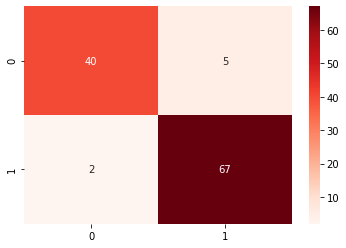

In [130]:

sns.heatmap(cm,annot=True, cmap='Reds')

In [118]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model, X=cancer.data, 
y=cancer.target, cv=kfold)

In [119]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [121]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators = {'GaussianNB': model,
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [132]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
